In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [3]:
data = pd.read_hdf('Data.h5')

[0.00664138 0.00659218 0.00662469 0.00680701 0.00672725 0.00672755
 0.00678742 0.00646367 0.00663295 0.00660821 0.00653243 0.00647618
 0.006505   0.00640962 0.0063444  0.00641969 0.00665437 0.0064744
 0.00646903 0.00638036 0.00656357 0.00622384 0.00625566 0.00617708
 0.00611291 0.00632508 0.00607229 0.00606012 0.00635697 0.0060315
 0.00611323 0.00594988 0.00604164 0.00574086 0.005839   0.0056235
 0.00581771 0.00562932 0.00555247 0.00564978 0.00562095 0.00547987
 0.00560088 0.00557459 0.00555991 0.00556601 0.0053078  0.00556811
 0.00553681 0.0053603  0.00522727 0.00536326 0.00544795 0.00534731
 0.005337   0.00546376 0.00532269 0.00535141 0.00528829 0.00517386
 0.00509554 0.00554928 0.00521756 0.0052011  0.00531103 0.00521643
 0.00530126 0.00519461 0.00539768 0.0052738  0.00527493 0.00525105
 0.00515395 0.00522736 0.00510109 0.0049976  0.00525134 0.00523663
 0.00512389 0.00515258 0.00531048 0.00531341 0.00526798 0.00498966
 0.0048888  0.00487385 0.00497148 0.00477764 0.00490907 0.0047416

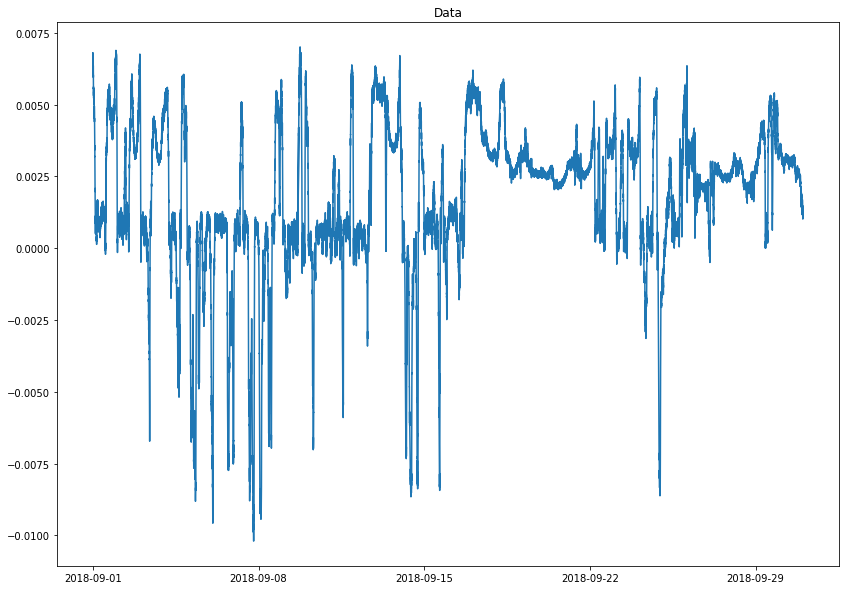

In [44]:
prev_steps = 100
i = np.random.randint(data.shape[1])
i = 708
plt.figure(figsize=(14,10))
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

X = []
y = []
for start in range(len(data.iloc[:,i][:-prev_steps])):
    tmp = data.iloc[:,i][start:start+prev_steps]
    X.append(tmp)
    y.append(data.iloc[:,i][start+prev_steps])
X = np.array(X)
y = np.array(y)
print(X[0])
print(y[0])

In [6]:
np.save('X', X)

In [46]:
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(prev_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [47]:
X = X.reshape(X.shape[0], X.shape[1], 1)
model.fit(X,y,epochs=40,batch_size=50)

Epoch 1/40
43100/43100 [==============================] - 20s 461us/step - loss: 2.6736e-07
Epoch 2/40
43100/43100 [==============================] - 19s 452us/step - loss: 8.0135e-08
Epoch 3/40
43100/43100 [==============================] - 20s 452us/step - loss: 6.5788e-08
Epoch 4/40
43100/43100 [==============================] - 19s 452us/step - loss: 6.0952e-08
Epoch 5/40
43100/43100 [==============================] - 19s 452us/step - loss: 5.1543e-08
Epoch 6/40
43100/43100 [==============================] - 20s 458us/step - loss: 4.9010e-08
Epoch 7/40
43100/43100 [==============================] - 20s 453us/step - loss: 4.5800e-08
Epoch 8/40
43100/43100 [==============================] - 20s 453us/step - loss: 4.2871e-08
Epoch 9/40
43100/43100 [==============================] - 20s 452us/step - loss: 4.2080e-08
Epoch 10/40
43100/43100 [==============================] - 20s 453us/step - loss: 3.8274e-08
Epoch 11/40
43100/43100 [==============================] - 20s 453us/step - los

In [37]:
preds = model.predict(X)
# del X
# errors1 = preds[:int(len(preds)/2)].reshape(-1) - y[:int(len(preds)/2)]
# errors2 = preds[int(len(preds)/2):].reshape(-1) - y[int(len(preds)/2):]
errors = preds.reshape(-1) - y

In [41]:
anomalies = errors > errors.mean() + 2 * errors.std()

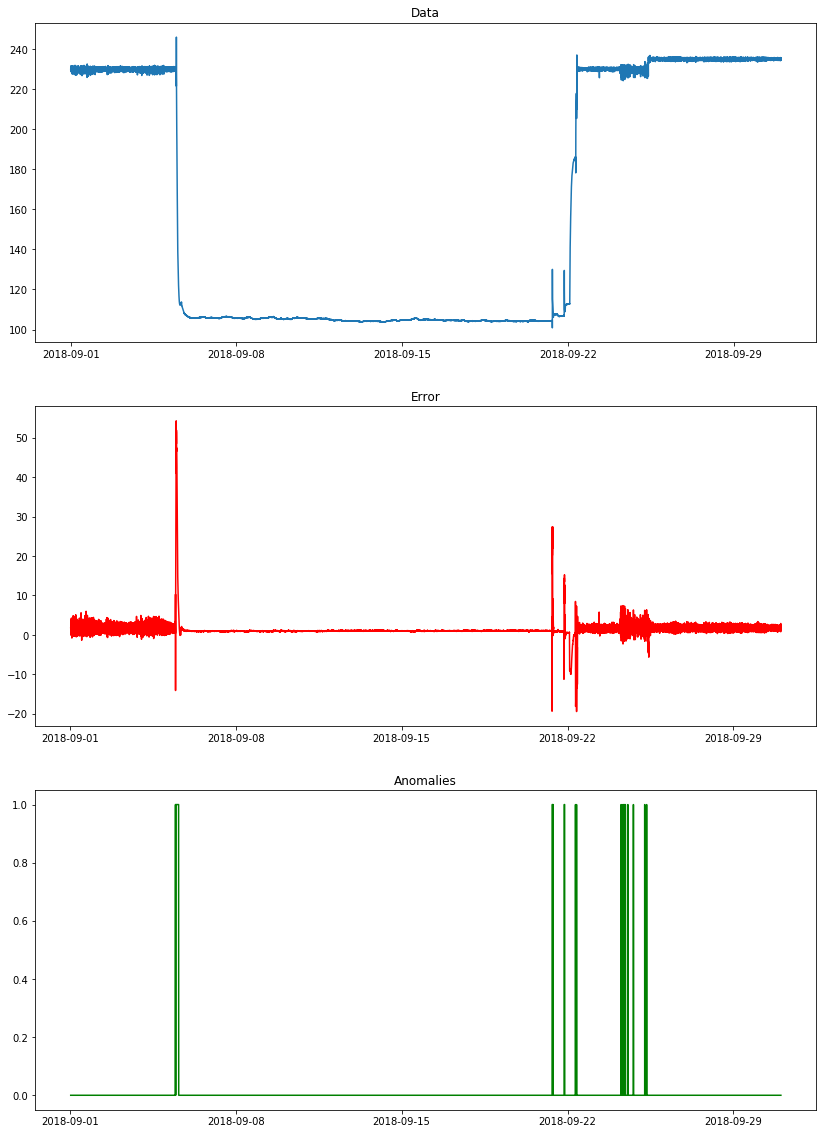

In [42]:
plt.figure(figsize=(14,20))
plt.subplot(3,1,1)
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

plt.subplot(3,1,2)
plt.title('Error')
plt.plot(data.index[prev_steps:], errors, color='red')

plt.subplot(3,1,3)
plt.title('Anomalies')
plt.plot(data.index[prev_steps:], anomalies, color='green')


In [ ]:
eror